Лабораторна робота №6
Базові операції з TenzorFlow. 
Виконав Лаптєв Олександр використовуючи файл 00_tensorflow_fundamentals

Частина 1: Базові операції з TensorFlow
Цей блок коду виконує завдання з 1 по 10.

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Створення вектора, скаляра, матриці та тензора 
# Скаляр (ранг 0)
scalar = tf.constant(7)
# Вектор (ранг 1)
vector = tf.constant([10, 10])
# Матриця (ранг 2)
matrix = tf.constant([[10, 7],
                      [7, 10]])
# Тензор (ранг 3+)
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])

print(f"Скаляр: {scalar}\nВектор: {vector}\nМатриця: {matrix}\nТензор: {tensor}\n")

# 2. Знаходження форми, рангу та розміру 
print("-" * 20)
print(f"Тензор - Форма: {tensor.shape}, Ранг (ndim): {tensor.ndim}, Розмір: {tf.size(tensor)}")

# 3. Створення двох тензорів з випадковими значеннями форми [5, 300] 
tf.random.set_seed(91) # Встановлюємо seed для відтворюваності, як у прикладі 
tensor_A = tf.random.uniform(shape=[5, 300], minval=0, maxval=1)
tensor_B = tf.random.uniform(shape=[5, 300], minval=0, maxval=1)
print("-" * 20)
print(f"Tensor A shape: {tensor_A.shape}")
print(f"Tensor B shape: {tensor_B.shape}")

# 4. Множення матриць 
# Примітка: Для множення матриць (5, 300) на (5, 300) потрібно транспонувати одну з них,
# оскільки внутрішні виміри мають збігатися (наприклад, 300 і 300 або 5 і 5).
result_matmul = tf.matmul(tensor_A, tf.transpose(tensor_B))
print("-" * 20)
print(f"Результат множення матриць (з транспонуванням B): {result_matmul.shape}")

# 5. Скалярний добуток (Dot product) 
# Використовуємо tf.tensordot. Потрібно вказати вісь.
result_dot = tf.tensordot(tensor_A, tf.transpose(tensor_B), axes=1)
print(f"Результат скалярного добутку: {result_dot.shape}")

# 6. Створення тензора випадкових значень форми [224, 224, 3] 
# Це стандартна форма для зображень (висота, ширина, колірні канали).
tensor_image = tf.random.uniform(shape=[224, 224, 3], minval=0, maxval=1)
print("-" * 20)
print(f"Тензор зображення: {tensor_image.shape}")

# 7. Знаходження мінімального та максимального значення 
min_val = tf.reduce_min(tensor_image)
max_val = tf.reduce_max(tensor_image)
print(f"Min: {min_val}, Max: {max_val}")

# 8. Стиснення тензора (Squeeze) 
# Створюємо тензор [1, 224, 224, 3]
tensor_unsqueezed = tf.random.uniform(shape=[1, 224, 224, 3])
# Видаляємо одниничні виміри
tensor_squeezed = tf.squeeze(tensor_unsqueezed)
print("-" * 20)
print(f"До стиснення: {tensor_unsqueezed.shape}")
print(f"Після стиснення: {tensor_squeezed.shape}")

# 9. Знаходження індексу максимального значення (Argmax) 
tensor_indices = tf.constant([10, 7, 3, 100, 4, 5, 20, 1, 0, 9]) # Тензор форми 
max_index = tf.argmax(tensor_indices)
print("-" * 20)
print("Тензор:")
print(tensor_indices.numpy())
print(f"Індекс максимального значення: {max_index}")

# 10. One-hot кодування 
# depth=101, оскільки максимальне значення у нас 100
one_hot_encoded = tf.one_hot(tensor_indices, depth=101) 
print(f"One-hot (перший елемент): {one_hot_encoded[0]}")

Скаляр: 7
Вектор: [10 10]
Матриця: [[10  7]
 [ 7 10]]
Тензор: [[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]]

--------------------
Тензор - Форма: (3, 2, 3), Ранг (ndim): 3, Розмір: 18
--------------------
Tensor A shape: (5, 300)
Tensor B shape: (5, 300)
--------------------
Результат множення матриць (з транспонуванням B): (5, 5)
Результат скалярного добутку: (5, 5)
--------------------
Тензор зображення: (224, 224, 3)
Min: 1.1920928955078125e-06, Max: 0.9999991655349731
--------------------
До стиснення: (1, 224, 224, 3)
Після стиснення: (224, 224, 3)
--------------------
Тензор:
[ 10   7   3 100   4   5  20   1   0   9]
Індекс максимального значення: 3
One-hot (перший елемент): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Частина 2: Перевірка GPU та Генерація даних
Цей блок виконує завдання 11, 15 та 16 (створення даних для регресії/класифікації та їх візуалізація).
На базових методах tenzorflow та mathplotlib


--------------------
Пристрої GPU: []


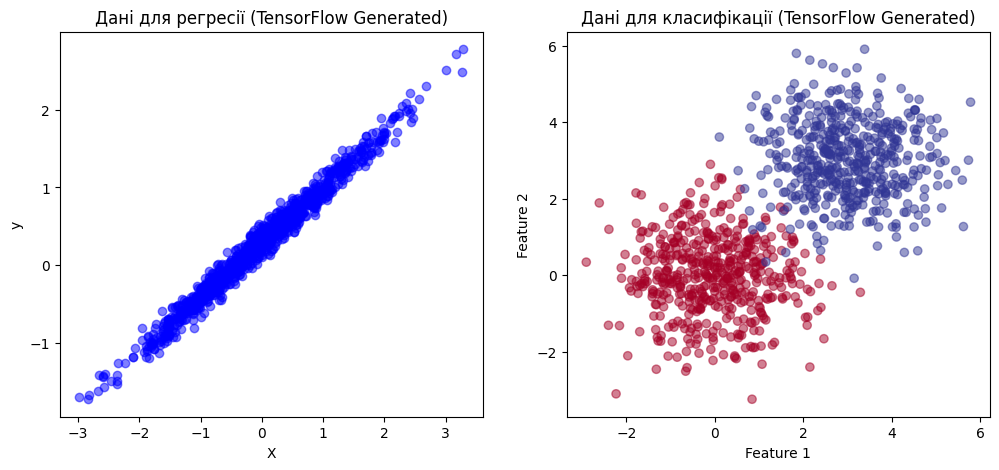

In [12]:
# 11. Перевірка доступу до GPU 
print("-" * 20)
print("Пристрої GPU:", tf.config.list_physical_devices('GPU'))

# 12. Генерація даних для регресії 
# Створимо синтетичні дані: y = weight * X + bias
n_samples = 1000
X_reg = tf.random.normal(shape=(n_samples, 1))
weight = 0.7
bias = 0.3
y_reg = weight * X_reg + bias + tf.random.normal(shape=(n_samples, 1), mean=0.0, stddev=0.1) # Додаємо шум

# 13. Генерація даних для класифікації 
# Створимо два кластери даних
# Клас 0
class_0_x = tf.random.normal(shape=(n_samples // 2, 2), mean=0.0, stddev=1.0)
class_0_y = tf.zeros(shape=(n_samples // 2, 1))
# Клас 1
class_1_x = tf.random.normal(shape=(n_samples // 2, 2), mean=3.0, stddev=1.0)
class_1_y = tf.ones(shape=(n_samples // 2, 1))

X_class = tf.concat([class_0_x, class_1_x], axis=0)
y_class = tf.concat([class_0_y, class_1_y], axis=0)

# 14. Графічний аналіз наборів даних (Matplotlib) 
plt.figure(figsize=(12, 5))

# Графік регресії
plt.subplot(1, 2, 1)
plt.scatter(X_reg, y_reg, c='b', alpha=0.5)
plt.title("Дані для регресії (TensorFlow Generated)")
plt.xlabel("X")
plt.ylabel("y")

# Графік класифікації
plt.subplot(1, 2, 2)
plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class[:, 0], cmap=plt.cm.RdYlBu, alpha=0.5)
plt.title("Дані для класифікації (TensorFlow Generated)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

Висновок
В ході виконання лабораторної роботи №6 я ознайомився(лась) з основами бібліотеки TensorFlow та навчився(лась) працювати з її основним типом даних — тензорами.

Мною були отримані практичні навички:

Створення тензорів: Я навчився(лась) створювати скаляри, вектори та матриці, використовуючи tf.constant та генератори випадкових чисел tf.random.

Аналіз властивостей: Відпрацьовано методи отримання інформації про тензори: їх форму (shape), ранг (ndim) та розмір (size).

Математичні операції: Виконано базові операції лінійної алгебри, такі як матричне множення (tf.matmul) та скалярний добуток (tf.tensordot), а також знаходження агрегованих значень (мінімум, максимум).

Маніпуляція даними: Освоєно зміну розмірності тензорів за допомогою tf.squeeze (видалення одиничних вимірів), знаходження індексів (tf.argmax).

Генерація та візуалізація даних: За допомогою TensorFlow було згенеровано синтетичні набори даних для задач регресії (лінійна залежність з шумом) та класифікації (кластеризовані дані). Отримані дані було успішно візуалізовано за допомогою бібліотеки Matplotlib.

Перевірка апаратного забезпечення: Також було проведено перевірку наявності доступних GPU для прискорення обчислень. У даному середовищі виконання бібліотека використовувала CPU (що підтвердив порожній список пристроїв GPU), однак код був написаний таким чином, що він сумісний з GPU при їх наявності.

Загальний підсумок: Робота дозволила зрозуміти, як TensorFlow представляє дані у вигляді багатовимірних масивів (тензорів) та як відбуваються низькорівневі операції, що є фундаментом для побудови та навчання нейронних мереж.